# **GA(Google Analytics) 데이터 활용 유저 분석**

> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* Process 1
* Process 2
* Process 3

## **문제상황 Introduction**
---

> **시나리오**

```
A사는 자사의 웹사이트에 대한 사용자의 행동 패턴과 트래픽 출처에 대한 깊은 이해를 갖기 원한다. 최근 웹사이트 방문자 수의 변동이 있었으나, 원인을 정확히 파악하지 못하고 있다. GA(Google Analytics)데이터를 통해 웹사이트의 사용자 행동 및 트래픽의 주요 원인을 파악하려 한다.

```

> **문제정의**

```
웹사이트의 트래픽과 사용자 행동 패턴의 변동원인에 대한 정보부족
```

> **기대효과**
```
사용자의 주요 행동 패턴과 유입 채널을 파악하여 효율적인 마케팅 전략 수립 및 웹사이트 개선 방향 설정
```
 
> **해결방안**

```
1. GA 데이터를 통해 주요 트래픽 소스 및 채널 그룹핑 분석
2. 사용자의 지리적 위치와 기기 정보에 따른 세그먼트 분석
3. 방문자의 세션 및 방문 시간 흐름 분석
```

> **성과측정**

```
분석을 통해 도출된 주요 트래픽 소스와 유저 행동 패턴의 변화를 기반으로 웹사이트의 방문자 수 및 사용자 행동(페이지 뷰, 체류시간 등)에 어떤 영향을 주는지 측성
```

> **운영**

```
GA 데이터를 주기적으로 모니터링하며, 도출된 인사이트를 바탕으로 웹사이트 및 마케팅 전략의 지속적인 개선 및 최적화 실시
```

> **데이터 살펴보기**
 * 데이터 명세 ▼

 | Column           | Description               |
 |:-------------|:----------------------|
 |channelGrouping|채널 그룹핑|
 |date|날짜|
 |device|기기정보|
 |fullVisitorId|방문자 전체 ID|
 |geoNetwork|지리적 네트워크 정보|
 |sessionId|세션 ID|
 |socialEngagementType|소셜 참여 유형|
 |totals|총계|
 |trafficSource|트래픽 소스|
 |visitId|방문 ID|
 |visitNumber|방문 횟수|
 |visitStartTime|방문 시작 시간|

In [1]:
# Warnings ignore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pd.set option

import numpy as np
import pandas as pd
import json
from pandas import json_normalize
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# Data read
json_cols=['device','geoNetwork','totals','trafficSource']
def load_df(filename):
    df=pd.read_csv(filename,converters={column :json.loads for column in json_cols },
                   dtype={'fullVisitorId':'str'})
    for column in json_cols:
        column_as_df=json_normalize(df[column])
        column_as_df.columns=[f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df=df.drop(column,axis=1).merge(column_as_df,right_index=True,left_index=True)
    return df
df=load_df("S_PJT10_DATA.csv")
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

## **Process01**
### **▲Data Info Check**


#### Data 전처리
---
* 수집된 데이터의 기본 정보들을 확인
    
    (1) Data shape(형태) 확인
    
    (2) Data type 확인
    
    (3) Null 값 확인 (※ 빈값의 Data)

    (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data) 


In [3]:
# Data check
print('df',df.shape)

df (903653, 55)


In [4]:
# Data type check

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device_browser                                     903653 non-null  object
 9   devi

In [5]:
# object type --> float type
df['totals_transactionRevenue']=df['totals_transactionRevenue'].astype(float)

In [6]:
# Null check
print(df.isnull().sum())

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device_browser                                            0
device_browserVersion                                     0
device_browserSize                                        0
device_operatingSystem                                    0
device_operatingSystemVersion                             0
device_isMobile                                           0
device_mobileDeviceBranding                               0
device_mobileDeviceModel                                  0
device_mobileInputSelector              

In [7]:
# Outlier check
df.describe()

,date,visitId,visitNumber,visitStartTime,totals_transactionRevenue
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05,1.151500e+04
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09,1.337448e+08
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06,4.482852e+08
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09,1.000000e+04
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09,2.493000e+07
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09,4.945000e+07
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09,1.076550e+08
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09,2.312950e+10


In [8]:
df.shape

(903653, 55)

### Data EDA
----

> 수집된 데이터의 기본정보들을 확인


In [9]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

In [10]:
df['date']=pd.to_datetime(df['date'],format='%Y%m%d')
df['date'].min(),df['date'].max()
# 2016-08-01 to 2017-08-01

(Timestamp('2016-08-01 00:00:00'), Timestamp('2017-08-01 00:00:00'))

## **Process02**
### **▲주요지표(KPI)추출**

#### 월별 MAU
----

In [11]:
# date 에서 월 추출
df['date'].dt.strftime('%m')

0         09
1         09
2         09
3         09
4         09
          ..
903648    01
903649    01
903650    01
903651    01
903652    01
Name: date, Length: 903653, dtype: object

In [12]:
# 월 기준 VisitorID Count
df.groupby(df['date'].dt.strftime('%Y-%m'))['fullVisitorId'].nunique()

date
2016-08    61699
2016-09    59121
2016-10    84901
2016-11    99734
2016-12    63839
2017-01    53041
2017-02    51364
2017-03    57888
2017-04    55681
2017-05    52233
2017-06    52067
2017-07    58569
2017-08     2293
Name: fullVisitorId, dtype: int64

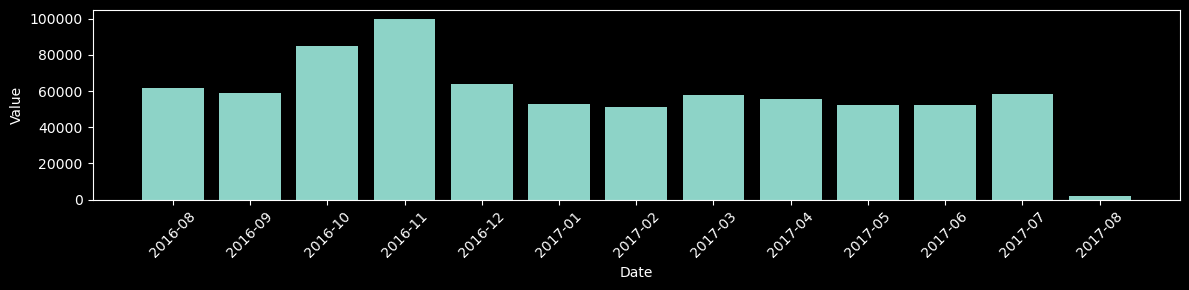

In [13]:
# 월 기준 VisitorID Count 시각화
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('dark_background')

df_mau=pd.DataFrame(df.groupby(df['date'].dt.strftime('%Y-%m'))['fullVisitorId'].nunique())

plt.figure(figsize=(12,3))
plt.bar(df_mau.index,df_mau['fullVisitorId'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


### 월별 Transaction AMT
---

In [14]:
# 'totals_transactionRevenue' 기준년월 분석
pd.DataFrame(df.groupby(df['date'].dt.strftime('%Y-%m'))['totals_transactionRevenue'].sum())

,totals_transactionRevenue
date,
2016-08,1.546666e+11
2016-09,1.260312e+11
2016-10,1.133291e+11
2016-11,1.190139e+11
2016-12,1.545579e+11
2017-01,9.787779e+10
2017-02,1.087565e+11
2017-03,1.309643e+11
2017-04,1.587888e+11


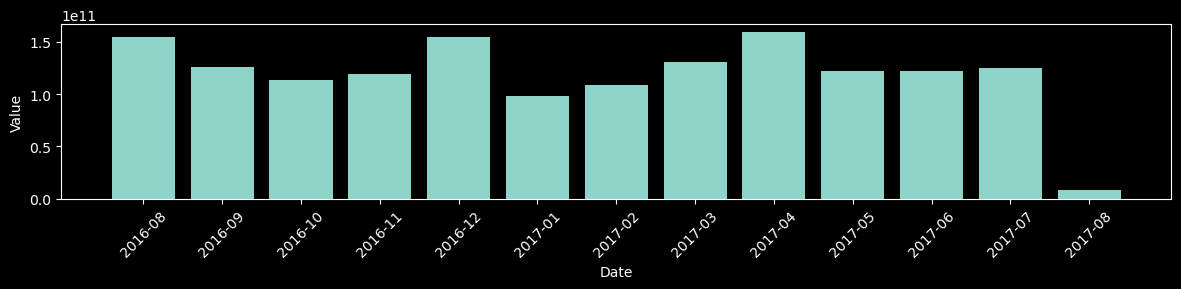

In [17]:
# 월 기준 Transaction AMT 시각화
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('dark_background')

df_amt=pd.DataFrame(df.groupby(df['date'].dt.strftime('%Y-%m'))['totals_transactionRevenue'].sum())

plt.figure(figsize=(12,3))
plt.bar(df_amt.index,df_amt['totals_transactionRevenue'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


### 월별 Conversion Rate
---

In [18]:
# 월별 Conversion Rate(1)
df_cov=pd.DataFrame(df.groupby(df['date'].dt.strftime('%Y-%m'))[['sessionId','totals_transactionRevenue']].agg(['count'])).reset_index()
df_cov.columns=['date','total','Revenue']
df_cov

,date,total,Revenue
0,2016-08,74759,1119
1,2016-09,71032,859
2,2016-10,97506,872
3,2016-11,113972,919
4,2016-12,79124,1395
5,2017-01,64694,697
6,2017-02,62192,708
7,2017-03,69931,883
8,2017-04,67126,928
9,2017-05,65371,1115


In [19]:
# 월별 Conversion Rate(2)
df_cov['cov_rate']=round((df_cov['Revenue']/df_cov['total'])*100,2)
df_cov

,date,total,Revenue,cov_rate
0,2016-08,74759,1119,1.50
1,2016-09,71032,859,1.21
2,2016-10,97506,872,0.89
3,2016-11,113972,919,0.81
4,2016-12,79124,1395,1.76
5,2017-01,64694,697,1.08
6,2017-02,62192,708,1.14
7,2017-03,69931,883,1.26
8,2017-04,67126,928,1.38
9,2017-05,65371,1115,1.71


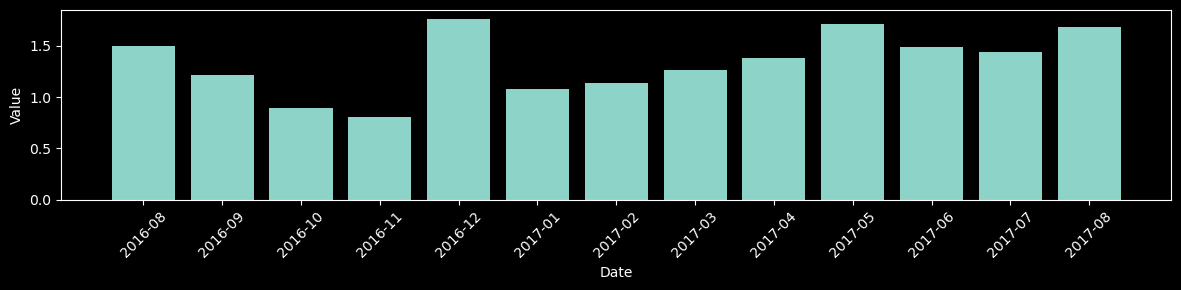

In [20]:
# 월별 Conversion Rate 시각화
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.figure(figsize=(12,3))
plt.bar(df_cov.date,df_cov['cov_rate'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

## **Process03**
### **▲Profit분석**

In [21]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False

#### Device Atrributes Analysis
----

In [22]:
# device로 시작하는 Col 출력
df.filter(like='device_').columns.tolist()

['device_browser',
 'device_browserVersion',
 'device_browserSize',
 'device_operatingSystem',
 'device_operatingSystemVersion',
 'device_isMobile',
 'device_mobileDeviceBranding',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_flashVersion',
 'device_language',
 'device_screenColors',
 'device_screenResolution',
 'device_deviceCategory']

In [23]:
# device_deviceCategroy별 profit

pd.DataFrame(df.groupby(df['device_deviceCategory'])['totals_transactionRevenue'].mean())

,totals_transactionRevenue
device_deviceCategory,
desktop,1.411019e+08
mobile,5.843405e+07
tablet,5.607940e+07


In [25]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#첫번째 그래프 데이터
df_device_browser=pd.DataFrame(df.groupby(df['device_browser'])['totals_transactionRevenue'].mean()).reset_index()
df_device_browser=df_device_browser.dropna().sort_values('totals_transactionRevenue',ascending=True)


#두번째 그래프 데이터
df_device_category=pd.DataFrame(df.groupby(df['device_deviceCategory'])['totals_transactionRevenue'].mean()).reset_index()
df_device_category=df_device_category.dropna().sort_values('totals_transactionRevenue',ascending=True)

#1X2 서브플롯 생성
fig = make_subplots(rows=1, cols=2, subplot_titles=('Transaction Revenue by Device Category', 'Transaction Revenue by Device Browser'))


# 'Device Category' 그래프를 첫번째 서브플롯에 추가(수평 막대그래프로 변경)
fig.add_trace(
    go.Bar(x=df_device_category['totals_transactionRevenue'], y=df_device_category['device_deviceCategory'],orientation='h'),
    row=1,col=1
)

#'Device Browser' 그래프를 두번 째 서브 플롯에 추가(수평 막대그래프로 변경)
fig.add_trace(
    go.Bar(x=df_device_browser['totals_transactionRevenue'],y=df_device_browser['device_browser'],orientation='h'),
    row=1,col=2
)

# 레이아웃 업데이트 및 출력
fig.update_layout(title_text="Transaction Revenue Analysis")
fig.show()

#### GeoNetwork Attributes Analysis

In [26]:
# geoNetwork 시작하는 Col 출력
df.filter(like='geoNetwork').columns.tolist()

['geoNetwork_continent',
 'geoNetwork_subContinent',
 'geoNetwork_country',
 'geoNetwork_region',
 'geoNetwork_metro',
 'geoNetwork_city',
 'geoNetwork_cityId',
 'geoNetwork_networkDomain',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_networkLocation']

In [28]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 첫번째 그래프 데이터
df_geoNetwork_continent = pd.DataFrame(df.groupby(df['geoNetwork_continent'])['totals_transactionRevenue'].mean()).reset_index()
df_geoNetwork_continent=df_geoNetwork_continent.dropna().sort_values('totals_transactionRevenue',ascending=True)

# 두번째 그래프 데이터
df_device_category=pd.DataFrame(df.groupby(df['device_deviceCategory'])['totals_transactionRevenue'].mean()).reset_index()
df_device_category=df_device_category.dropna().sort_values('totals_transactionRevenue',ascending=True)

#1X2 서브 플롯 생성
fig = make_subplots(rows=1,cols=2,subplot_titles=('Transaction Revenue by geoNetwork_subContinet','Transaction Revenue by deviceCategory'))

#'Device Category' 그래프를 첫번째 서브플롯에 추가(수평막대 그래프로 변경)
fig.add_trace(
    go.Bar(x=df_device_category['totals_transactionRevenue'],y=df_device_category['device_deviceCategory'],orientation='h'),
    row=1,col=1

)

#'Device Browser'그래프를 두번째 서브플롯에 추가(수평막대 그래프로 변경)
fig.add_trace(
    go.Bar(x=df_geoNetwork_continent['totals_transactionRevenue'],y=df_geoNetwork_continent['geoNetwork_continent'],orientation='h'),
    row=1 , col=2
)

# 레이아웃 업데이트 및 출력
fig.update_layout(title_text="Transaction Revenue Analysis")
fig.show()

#### trafficSource Analysis
---

In [29]:
# trafficSource 로 시작하는 Col 출력
df.filter(like='trafficSource').columns.to_list()

['trafficSource_campaign',
 'trafficSource_source',
 'trafficSource_medium',
 'trafficSource_keyword',
 'trafficSource_adwordsClickInfo.criteriaParameters',
 'trafficSource_isTrueDirect',
 'trafficSource_referralPath',
 'trafficSource_adwordsClickInfo.page',
 'trafficSource_adwordsClickInfo.slot',
 'trafficSource_adwordsClickInfo.gclId',
 'trafficSource_adwordsClickInfo.adNetworkType',
 'trafficSource_adwordsClickInfo.isVideoAd',
 'trafficSource_adContent',
 'trafficSource_campaignCode']

> trafficSource_campaign

```
이 컬럼은 방문자를 사이트로 유도한 광고 캠페인의 이름을 나타냅니다. 예를 들어, 특정 광고 캠페인을 통해 웹사이트에 방문한 사용자의 경우, 그 광고 캠페인의 이름이 이 컬럼에 기록됩니다.
주로 마케팅 팀이 다양한 광고 캠페인의 성능을 분석할 때 사용합니다.
예: "Black Friday Sale", "Summer Promotion" 등
```

> trafficSource_source

```
방문자가 사이트에 도달한 경로를 나타내는 컬럼입니다.
예를 들어, 사용자가 Google에서 검색하여 사이트에 접속한 경우 'google'이라는 값이 저장될 것입니다. 다른 예로, 페이스북 링크를 클릭하여 접속한 경우 'facebook.com'이라는 값이 저장될 것입니다.
예: "google", "facebook.com", "bing", "newsletter" 등
```
> trafficSource_medium

```
방문자가 사이트에 도달한 매체를 나타내는 컬럼입니다. 이 컬럼은 'source'보다 더 고수준의 정보를 제공합니다.
예를 들면, 방문자가 검색을 통해 사이트에 도달한 경우 'organic'이라는 값이 저장될 것입니다. 만약 유료 광고 클릭을 통해 도달한 경우 'cpc' (Cost Per Click) 값이 저장될 것입니다.
주로 사용되는 값들: "organic" (무료 검색 트래픽), "cpc" (유료 검색 트래픽), "referral" (다른 사이트를 통한 트래픽), "email" (이메일 마케팅을 통한 트래픽) 등
```

In [32]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 첫 번째 그래프 데이터
df_trafficSource_campaign=pd.DataFrame(df.groupby(df['trafficSource_campaign'])['totals_transactionRevenue'].mean()).reset_index()
df_trafficSource_campaign=df_trafficSource_campaign.dropna().sort_values("totals_transactionRevenue",ascending=True)

# 두 번째 그래프 데이터
df_trafficSource_medium=pd.DataFrame(df.groupby(df['trafficSource_medium'])['totals_transactionRevenue'].mean()).reset_index()
df_trafficSource_medium=df_trafficSource_medium.dropna().sort_values('totals_transactionRevenue',ascending=True)

# 1X2 서브플롯 생성
fig=make_subplots(rows=1,cols=2,subplot_titles=('Transaction Revenue by trafficSource_medium','Transaction Reveune by trafficSource_campaign'))

# 'trafficSource_medium' 그래프를 서브플롯에 추가 (수평 막대그래프로 변경)
fig.add_trace(
    go.Bar(x=df_trafficSource_medium['totals_transactionRevenue'],y=df_trafficSource_medium['trafficSource_medium'],orientation='h'),
    row=1,col=1
)

# 'trafficSource_campaign' 그래프를 두번째 서브플롯에 추가(수평 막대그래프로 변경)
fig.add_trace(
    go.Bar(x=df_trafficSource_campaign['totals_transactionRevenue'],y=df_trafficSource_campaign['trafficSource_campaign'],orientation='h'),
    row=1,col=2
)

# 레이아웃 업데이트 및 출력
fig.update_layout(title_text='Transaction Revenue Analysis')
fig.show()